<a href="https://colab.research.google.com/github/marianaamaya092105-wq/Challenge-Python-para-Data-Science/blob/main/RetoPythonParaDataScienceFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INFORME FINAL**


##**I. INTRODUCCIÓN**

El propósito del análisis realizado en el presente informe es de ayudar al Sr Juan a decidir qué tienda de su cadena debe vender para iniciar un nuevo emprendimiento. Para tomar esta decisión se debe definir cuál de las cuatro tiendas es la menos eficiente, y será esta la elegida.

##**II. METODOLOGÍA**

Primero se tomará la base de datos proporcionada (4 archivos, una por tienda). Se usarán las librerías Pandas y Matplotlib en Python para el análisis y visualización adecuada de los datos.

De estos datos se hará: 1) Caracterización de los datos (número de filas y columnas, tipos de variable); 2) Hallar el total de ventas por tienda; 3) Hallar número de ventas por cada tipo de producto, por cada tienda; 4) Hallar la calificación promedio por tienda; 5) Identificar los productos más y menos vendidos por tienda; 5) Costo promedio de envío en cada tienda; 6) Para los puntos anteriores, generar al menos tres gráficos.

##**III. RESULTADOS**

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


###1. Análisis de facturación



Ver numero de filas y columnas:

In [ ]:
tienda.shape
tienda2.shape
tienda3.shape
tienda4.shape

(2358, 12)

Ver básicos de los datos

In [ ]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


Suma de ventas por tienda en variables separadas

In [ ]:
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()
print(ingreso_tienda1)
print(ingreso_tienda2)
print(ingreso_tienda3)
print(ingreso_tienda4)

1150880400.0
1116343500.0
1098019600.0
1038375700.0


Crear un dataframe de los resultados

     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


<Axes: xlabel='Tienda'>

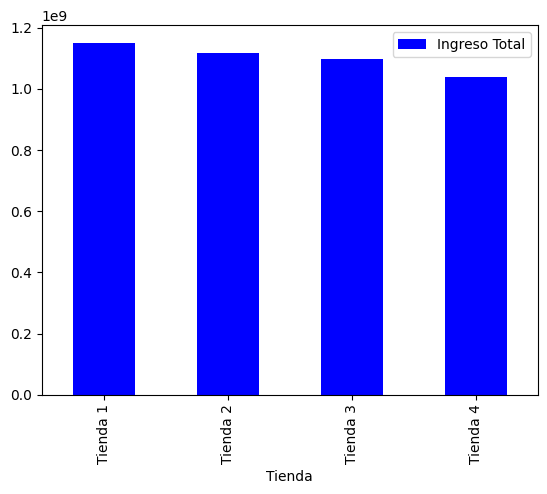

In [ ]:
ingresos_tiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [
        tienda["Precio"].sum(),
        tienda2["Precio"].sum(),
        tienda3["Precio"].sum(),
        tienda4["Precio"].sum()
    ]
})
print(ingresos_tiendas)

ingresos_tiendas.plot(x="Tienda", y="Ingreso Total", kind="bar", color="blue")

### 2. Ventas por categoría

Ver las categorias posibles

In [ ]:
tienda["Categoría del Producto"].unique()

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

Sumar por categoria

la categoría mas vendida fue:Muebles


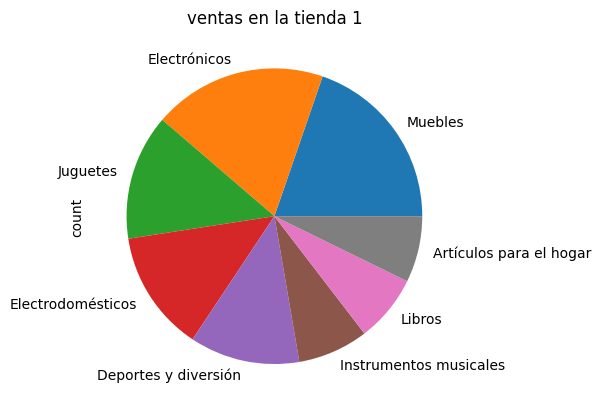

In [ ]:
#tienda 1
ventas_por_categoría=tienda["Categoría del Producto"].value_counts()
ventas_por_categoría.plot(kind="pie", title="ventas en la tienda 1")
#print(ventas_por_categoría2)
print("la categoría mas vendida fue:"+ ventas_por_categoría.idxmax())

la categoría mas vendida fue:Muebles


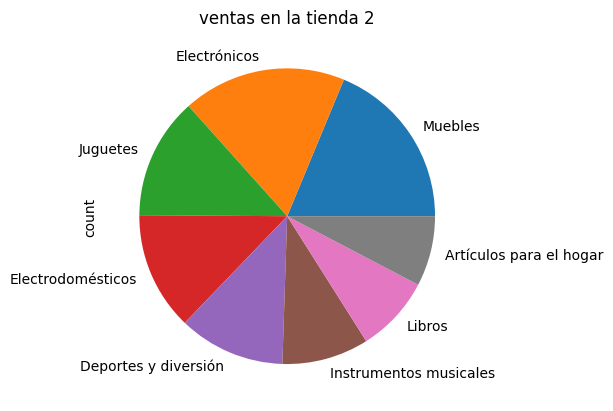

In [ ]:
#tienda 2
ventas_por_categoría2=tienda2["Categoría del Producto"].value_counts()
ventas_por_categoría2.plot(kind="pie", title="ventas en la tienda 2")
#print(ventas_por_categoría2)
print("la categoría mas vendida fue:"+ ventas_por_categoría2.idxmax())

la categoría mas vendida fue:Muebles


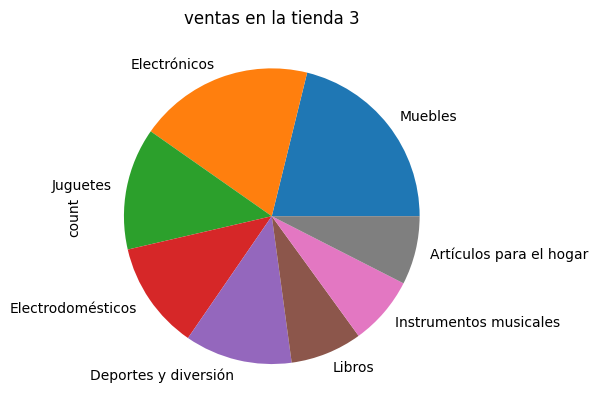

In [ ]:
#tienda 3
ventas_por_categoría3=tienda3["Categoría del Producto"].value_counts()
ventas_por_categoría3.plot(kind="pie", title="ventas en la tienda 3")
#print(ventas_por_categoría3)
print("la categoría mas vendida fue:"+ ventas_por_categoría3.idxmax())

la categoría mas vendida fue:Muebles


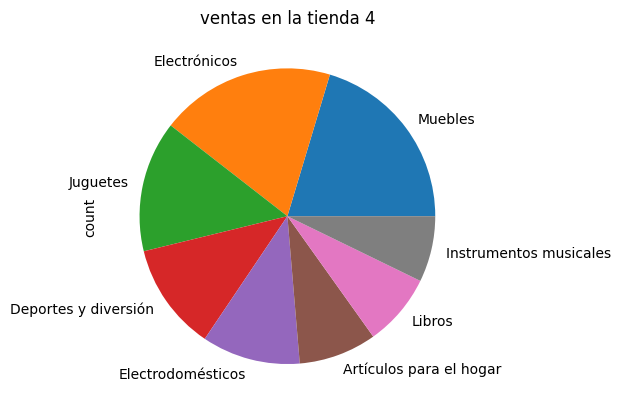

In [ ]:
#tienda 4
ventas_por_categoría4=tienda4["Categoría del Producto"].value_counts()
ventas_por_categoría4.plot(kind="pie", title="ventas en la tienda 4")
#print(ventas_por_categoría4)
print("la categoría mas vendida fue:"+ ventas_por_categoría4.idxmax())

### 3. Calificación promedio de la tienda


Promedio de calificación por tienda

     Tienda  Calificación promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


<Axes: xlabel='Tienda'>

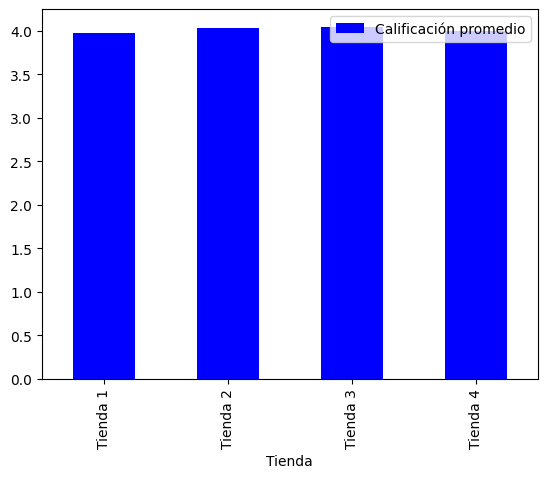

In [ ]:

promedio_por_tienda = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación promedio": [tienda['Calificación'].mean(),
tienda2['Calificación'].mean(),
tienda3['Calificación'].mean(),
tienda4['Calificación'].mean()]
})

print(promedio_por_tienda)

promedio_por_tienda.plot(x="Tienda", y="Calificación promedio", kind="bar", color="blue")



### 4. Productos más y menos vendidos

In [ ]:

ventas_por_producto=tienda["Producto"].value_counts()
#print(ventas_por_producto)
print("El producto más vendido en la tienda 1 fue:"+ ventas_por_producto.idxmax())
print("El producto menos vendido en la tienda 1 fue:"+ ventas_por_producto.idxmin())

ventas_por_producto2=tienda2["Producto"].value_counts()
#print(ventas_por_producto2)
print("El producto más vendido en la tienda 2 fue:"+ ventas_por_producto2.idxmax())
print("El producto menos vendido en la tienda 2 fue:"+ ventas_por_producto2.idxmin())

ventas_por_producto3=tienda3["Producto"].value_counts()
#print(ventas_por_producto3)
print("El producto más vendido en la tienda 3 fue:"+ ventas_por_producto3.idxmax())
print("El producto menos vendido en la tienda 3 fue:"+ ventas_por_producto3.idxmin())

ventas_por_producto4=tienda4["Producto"].value_counts()
#print(ventas_por_producto4)
print("El producto más vendido en la tienda 4 fue:"+ ventas_por_producto4.idxmax())
print("El producto menos vendido en la tienda 4 fue:"+ ventas_por_producto4.idxmin())


El producto más vendido en la tienda 1 fue:Microondas
El producto menos vendido en la tienda 1 fue:Auriculares con micrófono
El producto más vendido en la tienda 2 fue:Iniciando en programación
El producto menos vendido en la tienda 2 fue:Juego de mesa
El producto más vendido en la tienda 3 fue:Kit de bancas
El producto menos vendido en la tienda 3 fue:Bloques de construcción
El producto más vendido en la tienda 4 fue:Cama box
El producto menos vendido en la tienda 4 fue:Guitarra eléctrica


### 5. Envío promedio por tienda

     Tienda  Promedio costo de envio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


<Axes: xlabel='Tienda'>

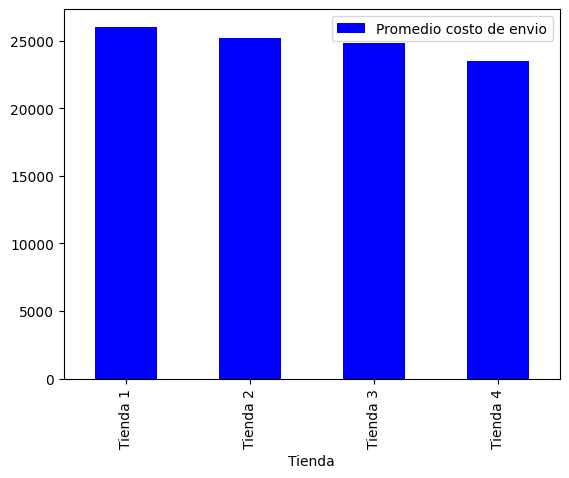

In [ ]:
promedio_gastos_tiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Promedio costo de envio": [
        tienda["Costo de envío"].mean(),
        tienda2["Costo de envío"].mean(),
        tienda3["Costo de envío"].mean(),
        tienda4["Costo de envío"].mean()
    ]
})
print(promedio_gastos_tiendas)
promedio_gastos_tiendas.plot(x="Tienda", y="Promedio costo de envio", kind="bar", color="blue")

##**IV. ANÁLISIS DE RESULTADOS Y RECOMENDACIONES**

En cuanto a los ingresos generados, se encontró que la tienda con mayores ingresos totales es la Tienda 1, la de menor volumen de ventas la Tienda 4.

En cuanto a los tipos de producto que se manejan, los electrónicos son los más vendidos en todas las tiendas, seguidos de los muebles y juguetes. Los que menos se venden son, a nivel general, los libros, instrumentos musicales, y artículos para el hogar, por lo que se recomienda evaluar si seguir vendiendo estos productos, o buscar estrategias para incrementar su nivel de ventas.

Acerca de la calificación de las tiendas, todas obtuvieron un puntaje similar, siendo la más alta 4.05 en la Tienda 3, y la de menor calificación la Tienda 1 con 3.98.

Por otra parte, la tienda que más gastos genera por envíos es la Tienda 1, que puede deberse a su nivel de ventas, pues es el más elevado de las cuatro.

En conclusión, y evaluando los datos obtenidos, se recomienda el cierre de la tienda 4 como la más factible, pues a pesar de que la Tienda 1 es la de más baja calificación y la de mayores gastos de transporte, no son cifras muy lejanas al del resto de tiendas. Además, es la tienda con mayor nivel de ventas (ingresos), que puede justificar la calificación baja (un posible mayor número de clientes que califican), y más costos logísticos, pues hay mayores ventas. En cambio, la tienda 4, tiene una calificación ligeramente mayor a la Tienda 1, pero menor al resto de las tiendas, además de tener el más bajo nivel de ingresos de entre todas las tiendas, y sus bajos costos de envío pueden deberse a su bajo nivel de ventas.